# 数据可视化

## 安装numpy和pandas包

In [ ]:
#安装所需要的库
import os
os.system("pip install --upgrade pip")
os.system("pip install numpy==1.19.5")
os.system("pip install pandas==1.1.5")
os.system("pip install matplotlib==3.3.4")

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
print(np.__version__)
print(pd.__version__)
print(mp.__version__)

1.19.5
1.1.5
3.3.4


如果显示的版本不是安装的版本，重启一下kernel就好了

In [2]:
#加在所需要的库
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#导入result.csv这个文件
text = pd.read_csv(r'result/result.csv')
text.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**最基本的可视化图案有哪些？**  
折线图、散点图、柱状图、圆饼图、气泡图

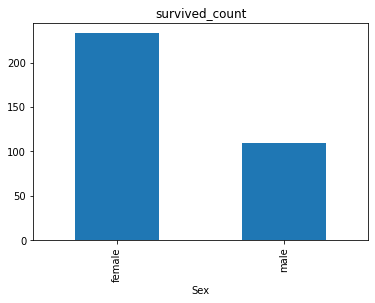

In [4]:
#可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）
sex = text.groupby('Sex')['Survived'].sum()
sex.plot.bar()
plt.title('survived_count')
plt.show()

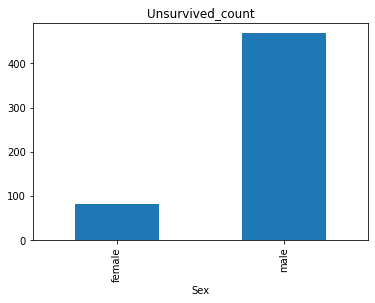

In [5]:
#计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示
unsurvied=text[text["Survived"]==0]
sex = unsurvied.groupby('Sex')['Survived'].count()
sex.plot.bar()
plt.title('Unsurvived_count')
plt.show()

Text(0, 0.5, 'count')

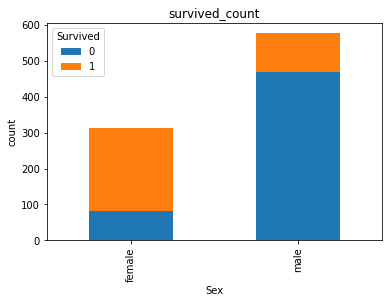

In [6]:
#可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图(用柱状图)
text.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('survived_count')
plt.ylabel('count')

In [7]:
#可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图）
# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡
fare_sur = text.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
fare_sur

Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
26.0000  0           16
                     ..
20.2500  1            1
         0            1
18.7875  1            1
         0            1
15.0500  0            1
Name: Survived, Length: 330, dtype: int64

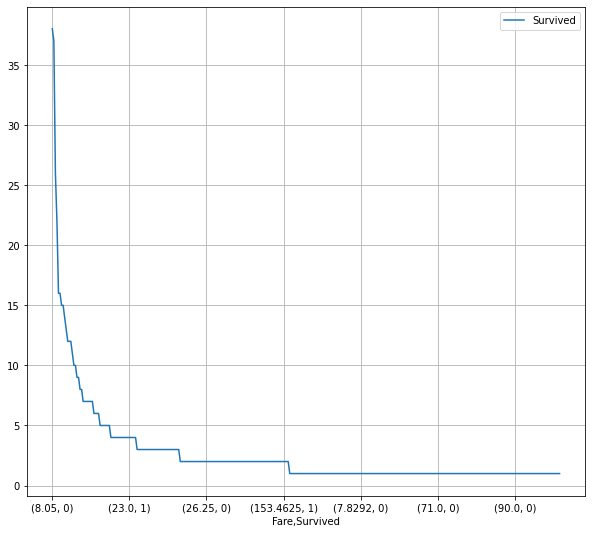

In [8]:
# 排序后绘折线图
fig = plt.figure(figsize=(10, 9))
fare_sur.plot(grid=True)
plt.legend()
plt.show()

In [9]:
# 排序前绘折线图
fare_sur1 = text.groupby(['Fare'])['Survived'].value_counts()
fare_sur1

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
                      ..
247.5208  1            1
262.3750  1            2
263.0000  0            2
          1            2
512.3292  1            3
Name: Survived, Length: 330, dtype: int64

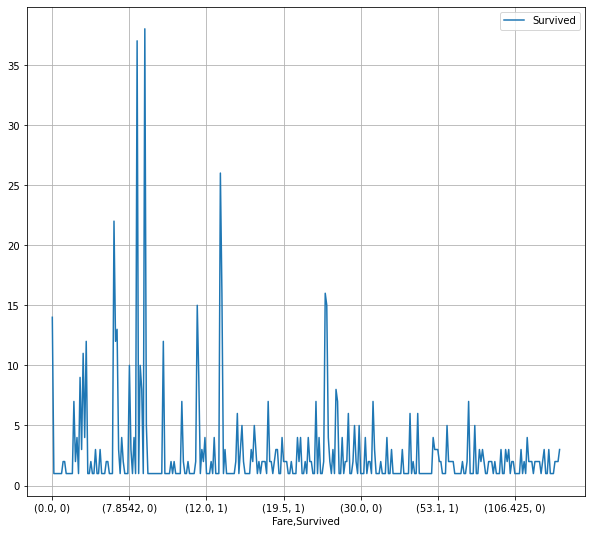

In [10]:
fig = plt.figure(figsize=(10, 9))
fare_sur1.plot(grid=True)
plt.legend()
plt.show()

In [11]:
#可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况
# 1表示生存，0表示死亡
pclass_sur = text.groupby(['Pclass'])['Survived'].value_counts()
pclass_sur

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

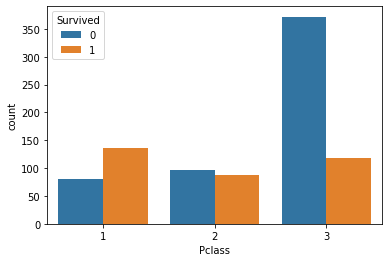

In [12]:
import seaborn as sns
sns.countplot(x="Pclass", hue="Survived", data=text)

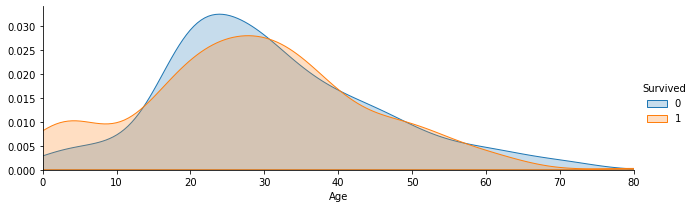

In [13]:
#可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况
facet = sns.FacetGrid(text, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, text['Age'].max()))
facet.add_legend()

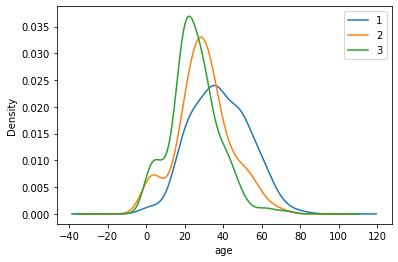

In [14]:
#可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图）
text.Age[text.Pclass == 1].plot(kind='kde')
text.Age[text.Pclass == 2].plot(kind='kde')
text.Age[text.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")